https://github.com/skchandrappa/dsa-cookbook.git


# Audio Context Processing using LLM's

Basics :

Samples of Audio :
Sampling Rate:
Amplitude and bit Depth :  


In [5]:
!pip install librosa

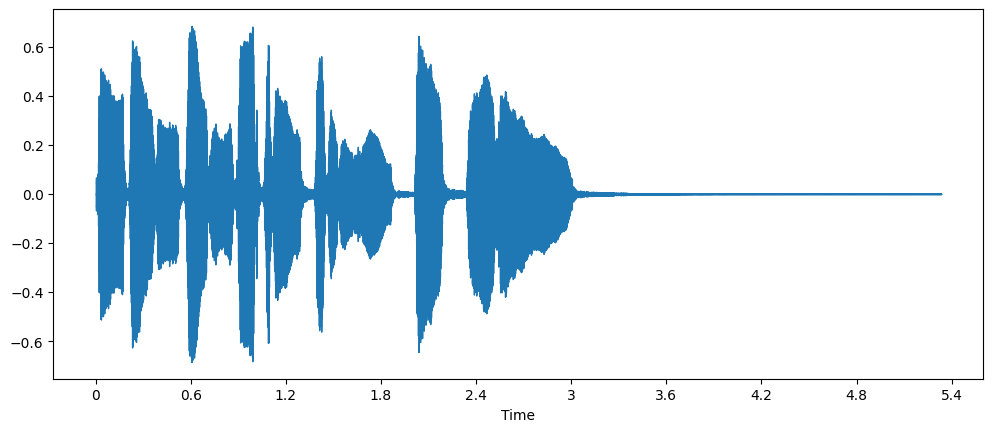

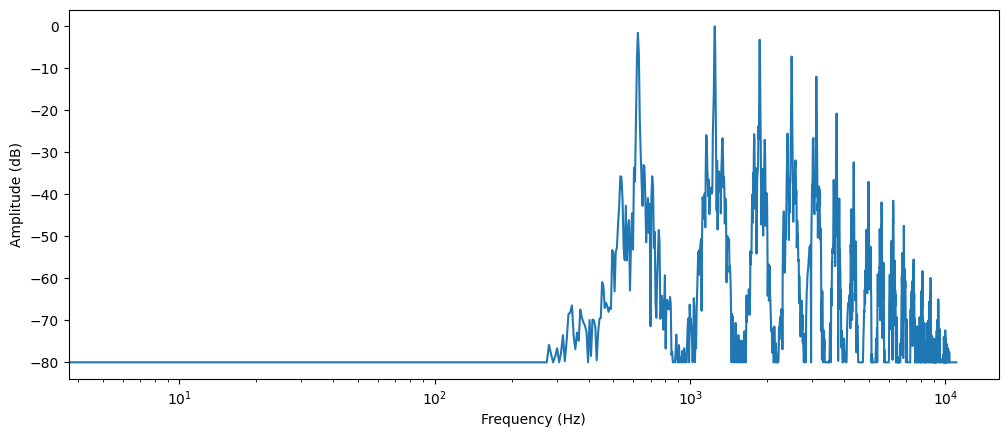

In [5]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

array, sampling_rate = librosa.load(librosa.ex("trumpet"))

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

### Waveforms.

import numpy as np
dft_input = array[:4096]

window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

In [17]:
# --- Google Colab Sample: Record Audio, Optional Speaker Diarization, and Speech-to-Text ---

# SECTION 1: Setup and Installation
# ---------------------------------
print("Setting up environment...")
!pip install -q sounddevice ipython pydub transformers accelerate optimum openai torchaudio librosa
!pip install -q pyannote.audio==3.1.1 # Specific version for compatibility
print("Environment setup complete.")


Setting up environment...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.7/208.7 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [19]:
print("Setting up environment...")
!apt-get update # Update package lists
!apt-get install -y portaudio19-dev # Install PortAudio development files
!pip install -q sounddevice ipython pydub transformers accelerate optimum openai torchaudio librosa
!pip install -q pyannote.audio==3.1.1 # Specific version for compatibility
print("Environment setup complete.")

Setting up environment...
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,986 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,249 kB]
Get:13 https://developer.dow

In [ ]:
# Import necessary libraries
import sounddevice as sd
from scipy.io.wavfile import write
from IPython.display import Audio, display
import io
import numpy as np
import os
import torch
from transformers import pipeline
import warnings

# Suppress some warnings for cleaner output
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# --- SECTION 2: Record Audio ---
# -----------------------------

def record_audio(filename="output.wav", duration=5, samplerate=16000):
    """
    Records audio from the microphone.
    Args:
        filename (str): Name of the file to save the audio.
        duration (int): Duration of the recording in seconds.
        samplerate (int): Sample rate of the audio (Hz).
    """
    print(f"Recording for {duration} seconds... Please speak clearly.")
    sd.default.samplerate = samplerate
    sd.default.channels = 1  # Mono
    myrecording = sd.rec(int(duration * samplerate), samplerate=samplerate, channels=1)
    sd.wait()  # Wait until recording is finished
    write(filename, samplerate, myrecording)  # Save as WAV file
    print(f"Recording complete. Audio saved to {filename}")
    display(Audio(filename)) # Play back the recording
    return filename

# Record a 10-second audio clip
audio_file = record_audio(duration=10)

In [16]:



# --- SECTION 3: Speech-to-Text Conversion ---
# ------------------------------------------

print("\n--- Performing Speech-to-Text Conversion ---")

# Load a pre-trained ASR (Automatic Speech Recognition) model
# We'll use a smaller, faster model like 'facebook/wav2vec2-base-960h' or 'openai/whisper-tiny'
# For better accuracy, consider 'openai/whisper-small' or 'openai/whisper-base' but they are slower.
# 'openai/whisper-tiny' is good for quick demos.
try:
    pipe = pipeline("automatic-speech-recognition", model="openai/whisper-tiny", device=0 if torch.cuda.is_available() else -1)
    print("ASR model 'openai/whisper-tiny' loaded successfully.")
except Exception as e:
    print(f"Could not load Whisper Tiny model: {e}. Trying with 'facebook/wav2vec2-base-960h'.")
    pipe = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-base-960h", device=0 if torch.cuda.is_available() else -1)

# Perform speech-to-text
try:
    text_result = pipe(audio_file)
    print("\n--- Transcription Result ---")
    print(text_result["text"])
except Exception as e:
    print(f"Error during transcription: {e}")
    print("Please ensure the audio file is valid and the model loaded correctly.")

# --- SECTION 4: Optional: Speaker Diarization (Identify *different* speakers) ---
# -----------------------------------------------------------------------------
# This section requires a Hugging Face token if you use pyannote.audio directly from their models.
# You can get one from huggingface.co/settings/tokens
# For this example, we'll try to use a more direct pipeline if possible or provide guidance.

print("\n--- Optional: Performing Speaker Diarization ---")
print("Note: Speaker diarization identifies *different* speakers, not *who* they are.")
print("For best results, you might need to authenticate with Hugging Face for pyannote.audio models.")
print("Visit huggingface.co/pyannote/speaker-diarization and follow instructions to accept terms.")
print("Then, run: from huggingface_hub import login; login()")

try:
    # Attempt to load pyannote.audio diarization pipeline
    # You might need to authenticate:
    # from huggingface_hub import login
    # login("YOUR_HF_TOKEN") # Uncomment and replace with your actual token

    from pyannote.audio import Pipeline
    # For a local Colab run, using a smaller, less accurate model might be easier
    # Or ensure you have accepted the terms on Hugging Face for the "pyannote/speaker-diarization" model.
    diarization_pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization@2.1",
                                                  use_auth_token=True) # Set to True if you logged in
    print("Speaker Diarization pipeline loaded successfully.")

    # Apply the pipeline to your audio file
    diarization_result = diarization_pipeline(audio_file)

    print("\n--- Speaker Diarization Result ---")
    # Print the diarization segments
    for turn, _, speaker in diarization_result.itertracks(yield_label=True):
        print(f"start={turn.start:.1f}s stop={turn.end:.1f}s speaker={speaker}")

except Exception as e:
    print(f"Error during speaker diarization: {e}")
    print("Speaker diarization failed. This often requires a Hugging Face token and accepting model terms.")
    print("Please refer to the pyannote.audio documentation for authentication steps if needed.")

# --- SECTION 5: Next Steps for Person Identification (Conceptual) ---
# ------------------------------------------------------------------
print("\n--- Next Steps for Person Identification (Conceptual) ---")
print("To identify *who* a speaker is, you would typically need:")
print("1. A dataset of audio recordings where each recording is labeled with the speaker's identity.")
print("2. A speaker recognition model (e.g., based on embeddings like x-vectors or d-vectors) trained on this dataset.")
print("3. An inference step where an unknown speaker's audio is compared against your database of known speaker embeddings.")
print("This is a significantly more complex task and usually involves building and training a custom model or using specialized APIs.")
print("Popular libraries for speaker recognition include SpeechBrain or specialized cloud APIs (e.g., Google Cloud Speech-to-Text with Speaker Diarization if it supports identity, or custom solutions).")

Setting up environment...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.6/424.6 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.6 MB/s eta 0:00:00
   ━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/664.8 MB 92.0 MB/s eta 0:00:07
ERROR: Operation cancelled by user


KeyboardInterrupt: 

In [11]:
minds

NameError: name 'minds' is not defined